In [5]:
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt

In [6]:
from sympy import Matrix
from sympy.printing.latex import latex

In [7]:
def transformation_matrix(N):
    matrix = np.zeros((N, N))
    # Fill ones in the subdiagonals
    np.fill_diagonal(matrix[1:], 1)  
    np.fill_diagonal(matrix[2:], 1)  
    # Fill ones in the superdiagonal
    np.fill_diagonal(matrix[:, 1:], 1)  
    np.fill_diagonal(matrix[:, 2:], 1)  

    # Connect the first and last rows for the periodic boundary conditions
    np.fill_diagonal(matrix[:, -1:], 1)
    np.fill_diagonal(matrix[:, -2:], 1)

    np.fill_diagonal(matrix[-1:, :], 1)
    np.fill_diagonal(matrix[-2:, :], 1)


    return matrix/4 # Normalize the markov matrix 

def save_mat_to_latex(M, filename):
    sym_M = Matrix(M)
    # Get the LaTeX representation of the matrix
    latex_code = latex(sym_M)

    # Write LaTeX code to a .tex file
    file_path = 'data/raw/transformation_mat/'+filename
    print(file_path)
    with open(file_path, 'w') as file:
        file.write(latex_code)


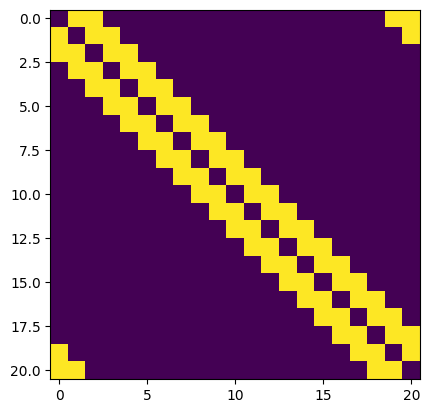

In [8]:
dim = 21 # Dimension of the matrix
N = 51 
T = transformation_matrix(dim)
plt.imshow(T)

data/raw/transformation_mat/matrix_21x21.tex
3.637978807091714e-12


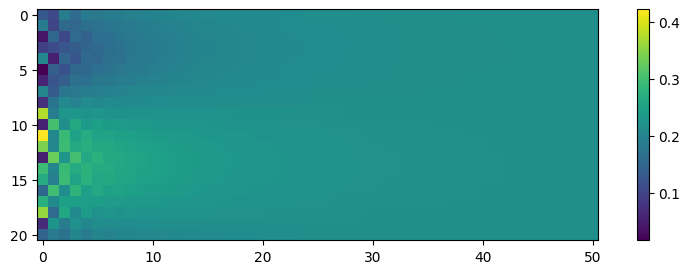

In [9]:


m = T.shape[0]
n = T.shape[1]
save_mat_to_latex(T, 'matrix_'+str(m)+'x'+str(n)+'.tex')
print(np.linalg.det(T))
t = np.linspace(0,N-1,N) #timesteps


V0 = np.random.rand(dim)
sol = np.zeros((dim,N))
sol[:,0] = V0/np.linalg.norm(V0)
sol[:, 0] /= np.linalg.norm(sol[:, 0])

for i in range(1, N):
    sol[:, i] = np.dot(T, sol[:, i-1])
    sol[:, i] /= np.linalg.norm(sol[:, i-1])

plt.figure(figsize=(10,3))
plt.imshow(sol)
plt.colorbar()


In [10]:
print('K for the simply connected matrix:', np.linalg.cond(T))

K for the simply connected matrix: 60.13587019314688


In [11]:
# Function to perform power iteration to find the largest eigenvalue and the corresponding eigenvector
def power_iteration(A, x, max_iter=10000):
    tol = 1e-14

    eigenval_prev = 0
    
    for _ in range(max_iter): 
        # Compute the updated approximation for the eigenvector 
        x = A @ x / np.linalg.norm(A @ x) 
        # Compute the updated approximation for the largest eigenvalue 
        eigenval = (x.T @ A @ x) / (x.T @ x) 
        # Check if the approximations have converged 
        if np.abs(eigenval - eigenval_prev) < tol: 
            break
        # Store the current approximation for the largest eigenvalue 
        eigenval_prev = eigenval 
    
    return eigenval, x 

def inverse_power_iteration(A, x, max_iter=10000):
    tol = 1e-14

    A_inv = sp.linalg.inv(A)
    
    eigenval_prev = 0
    
    for _ in range(max_iter): 
        # Compute the updated approximation for the eigenvector 
        x = A_inv @ x / np.linalg.norm(A_inv @ x) 
        # Compute the updated approximation for the largest eigenvalue 
        eigenval = (x.T @ A @ x) / (x.T @ x) 
        # Check if the approximations have converged 
        if np.abs(eigenval - eigenval_prev) < tol: 
            break
        # Store the current approximation for the largest eigenvalue 
        eigenval_prev = eigenval 
    
    return eigenval, x 

x = np.random.rand(T.shape[1])

# Perform iterations
largest_eigenvalue, largest_eigenvector = power_iteration(T,x)
smallest_eigenvalue, smallest_eigenvector = inverse_power_iteration(T,x)

# Verification using linalg.eig
eigenvalues, eigenvectors = np.linalg.eig(T)
eigenvectors = eigenvectors.T
# Display results
print("Iterative Method Results:")
print("Largest Eigenvalue:", largest_eigenvalue)
print("Largest Eigenvector:", largest_eigenvector)
print("Smallest Eigenvalue:", smallest_eigenvalue)
print("Smallest Eigenvector:", smallest_eigenvector)

print("\nVerification using np.linalg.eig:")
print("Largest Eigenvalue:", eigenvalues[np.where(eigenvalues == np.max(eigenvalues))])
print("Largest Eigenvector:", eigenvectors[np.where(eigenvalues == np.max(eigenvalues))])
print("Smallest Eigenvalue:", eigenvalues[np.where(abs(eigenvalues) == np.min(abs(eigenvalues)))])
print("Smallest Eigenvector:", eigenvectors[np.where(abs(eigenvalues) == np.min(abs(eigenvalues)))])

print("\nError eps_max = ", abs((largest_eigenvalue-eigenvalues[np.where(eigenvalues == np.max(eigenvalues))])/eigenvalues[np.where(eigenvalues == np.max(eigenvalues))]))
print("\nError eps_min = ", abs((smallest_eigenvalue-eigenvalues[np.where(abs(eigenvalues) == np.min(abs(eigenvalues)))])/eigenvalues[np.where(abs(eigenvalues) == np.min(abs(eigenvalues)))]))

Iterative Method Results:
Largest Eigenvalue: 0.9999999999999655
Largest Eigenvector: [0.21821797 0.21821792 0.21821787 0.21821782 0.21821778 0.21821774
 0.21821772 0.21821772 0.21821773 0.21821775 0.21821779 0.21821783
 0.21821788 0.21821794 0.21821798 0.21821802 0.21821805 0.21821806
 0.21821806 0.21821804 0.21821801]
Smallest Eigenvalue: -0.01662901021949392
Smallest Eigenvector: [-0.19078063  0.15249639 -0.11080563  0.06663966 -0.02098506 -0.0251383
  0.07070012 -0.11468261  0.15610328 -0.19403686  0.22763599 -0.2561501
  0.27894224 -0.29550327  0.30546324 -0.30859968  0.3048425  -0.29427565
  0.27713516 -0.25380394  0.22480315]

Verification using np.linalg.eig:
Largest Eigenvalue: [1.]
Largest Eigenvector: [[-0.21821789 -0.21821789 -0.21821789 -0.21821789 -0.21821789 -0.21821789
  -0.21821789 -0.21821789 -0.21821789 -0.21821789 -0.21821789 -0.21821789
  -0.21821789 -0.21821789 -0.21821789 -0.21821789 -0.21821789 -0.21821789
  -0.21821789 -0.21821789 -0.21821789]]
Smallest Eigenva

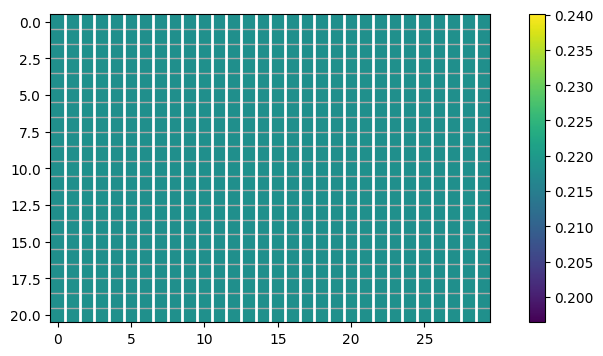

In [12]:
iter = 30
V0 = np.random.rand(dim)
V0 = V0/np.linalg.norm(V0)
sol = np.zeros((dim, iter))
sol[:, 0] = np.linalg.matrix_power(T,1000) @ V0 
sol[:, 0] = sol[:, 0]/np.linalg.norm(sol[:, 0])

for i in range(1, iter):
    V0 = np.random.rand(dim)
    V0 = V0/np.linalg.norm(V0)
    sol[:, i] = np.linalg.matrix_power(T,1000) @ V0
    sol[:, i] = sol[:, i]/np.linalg.norm(sol[:, i])

plt.figure(figsize=(10,4))
plt.imshow(sol)
plt.colorbar()
for i in range(sol.shape[0] - 1):
    plt.axhline(y=i + 0.5, color='darkgrey', linestyle='-', linewidth=1)

for i in range(sol.shape[1] - 1):
    plt.axvline(x=i + 0.5, color='white', linestyle='-', linewidth=2)


In [13]:
def is_eigenvector(v, eigenvectors, tolerance=1e-6):
    v_norm = v / np.linalg.norm(v)  # Normalize the test vector

    for eigenvector in eigenvectors:
        eigenvector_norm = eigenvector / np.linalg.norm(eigenvector)  # Normalize the eigenvector

        # Check if the absolute value of the dot product is close to 1
        if np.abs(np.dot(v_norm, eigenvector_norm)) > 1 - tolerance:
            return True
    
    return False

In [14]:
print(is_eigenvector(sol[:,0], eigenvectors)) # See that the state vector converges towards 


True


The eigenvectors of $T$ provide insight into how changes in the network's state propagate. If $T$ has a dominant eigenvalue (say $\lambda_1$), whose magnitude is larger than that of other eigenvalues, and the corresponding eigenvector $u_1$, then as $n$ grows large, $T^n$ effectively becomes dominated by $\lambda_1^n$, aligning all resulting vectors along $u_1$:
$$
\lim_{n \to \infty} T^n \approx \lambda_1^n u_1 u_1^T
$$
This expression indicates that for large $n$, the transformation $T^n$ simplifies to the outer product of $u_1$ with itself, scaled by $\lambda_1^n$, which projects any vector it transforms into the direction defined by $u_1$.


data/raw/transformation_mat/disjointed.tex


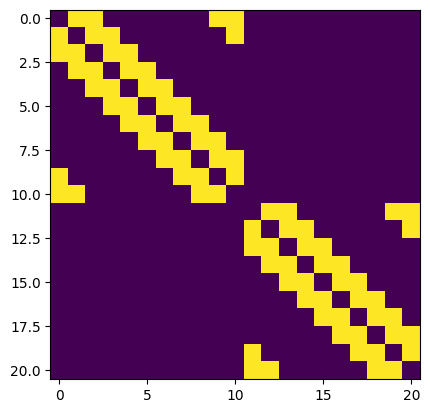

In [15]:
def fully_connected_adjacency(n):
    return np.ones((n, n)) - np.eye(n)

# Sub-network sizes
n1, n2 = 11, 10

# Create adjacency matrices for both sub-networks
A1 = transformation_matrix(n1)
A2 = transformation_matrix(n2)

# Combine into a single adjacency matrix for the entire system
A = np.block([
    [A1, np.zeros((n1, n2))],
    [np.zeros((n2, n1)), A2]
])
plt.imshow(A)

save_mat_to_latex(A,'disjointed.tex')

In [16]:
# Eigenvalues using linalg.eig
eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvectors = eigenvectors.T

# Find the largest and smallest eigenvalues (ignore tiny imaginary parts due to computational issues)
sorted_indices = np.argsort(abs(eigenvalues))
largest_eigenvalue = eigenvalues[sorted_indices[-1]]
smallest_eigenvalue = eigenvalues[sorted_indices[0]]
largest_eigenvector = eigenvectors[:, sorted_indices[-1]]
smallest_eigenvector = eigenvectors[:, sorted_indices[0]]

print("\nVerification using np.linalg.eig:")
print("Largest Eigenvalues (1), (2):", eigenvalues[sorted_indices[-1]])
print()
print("Largest Eigenvector (1):", eigenvectors[:, sorted_indices[-1]])
print("Largest Eigenvector (2):", eigenvectors[:, sorted_indices[-2]],"\n\n")

print("\nVerification using np.linalg.eig:")
print("Smallest Eigenvalues (1):", eigenvalues[sorted_indices[1]])
print("Smallest Eigenvalues (2):", eigenvalues[sorted_indices[2]])
print()
print("Smallest Eigenvector (1):", eigenvectors[:, sorted_indices[1]])
print("Smallest Eigenvector (2):", eigenvectors[:, sorted_indices[2]])


Verification using np.linalg.eig:
Largest Eigenvalues (1), (2): 1.0000000000000009

Largest Eigenvector (1): [-0.30151134 -0.42640143  0.02479785 -0.42640143  0.00422679  0.42640143
  0.00729082  0.41503642 -0.02557686 -0.42640143  0.02560404  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
Largest Eigenvector (2): [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.31622777
 -0.31622777 -0.21975425  0.20019004  0.4472136  -0.20733376  0.63245553
  0.02409836  0.13867367 -0.07210001] 



Verification using np.linalg.eig:
Smallest Eigenvalues (1): -0.059119720391658005
Smallest Eigenvalues (2): -0.059119720391658186

Smallest Eigenvector (1): [-0.30151134  0.06068325  0.41781784 -0.17713356 -0.38609346  0.35871171
 -0.22436289 -0.19788604  0.33842173  0.40912918 -0.14448129  0.
  0.          0.          0.          0.          0.          0.
  0.       

K for the disjointed matrix: 4.028967658534014e+17


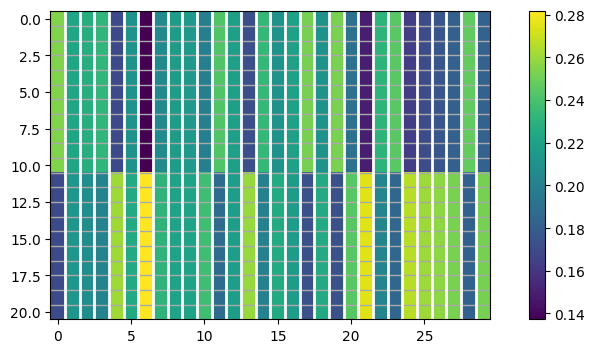

In [17]:
iter = 30
V0 = np.random.rand(dim)
V0 = V0/np.linalg.norm(V0)
sol = np.zeros((dim, iter))
sol[:, 0] = np.linalg.matrix_power(A,1000) @ V0 
sol[:, 0] = sol[:, 0]/np.linalg.norm(sol[:, 0])

for i in range(1, iter):
    V0 = np.random.rand(dim)
    V0 = V0/np.linalg.norm(V0)
    sol[:, i] = np.linalg.matrix_power(A,1000) @ V0
    sol[:, i] = sol[:, i]/np.linalg.norm(sol[:, i])

plt.figure(figsize=(10,4))
plt.imshow(sol)
plt.colorbar()
for i in range(sol.shape[0] - 1):
    plt.axhline(y=i + 0.5, color='darkgrey', linestyle='-', linewidth=1)

for i in range(sol.shape[1] - 1):
    plt.axvline(x=i + 0.5, color='white', linestyle='-', linewidth=2)

print('K for the disjointed matrix:', np.linalg.cond(A))

The system chooses one of the dominating eigenstates depending on the initial state.
$${\text {Relative error in output} \over \text {Relative error in input}} \leq K(\mathbf{A}) \rightarrow {\lVert \Delta x \rVert \over  {\lVert x \rVert}} \leq K(\mathbf{A}) {\lVert \Delta b \rVert \over {\lVert b \rVert}}$$  
High K number indicates ill conditioned matrix.
$$ K(\mathbf{A}) = {\lVert A^{-1} \rVert}\cdot {\lVert A \rVert}$$


In [18]:
import time
import timeit

In [19]:
def inv_solve(A,v):
    if (np.linalg.det(A)==0):
        return "Error" #return error if a matrix is not invertible 
    return np.linalg.inv(A) @ v


In [20]:
b = np.ones(dim)
for i in range(1,dim+1):
    b[i-1]/=i

print("Finding V(t-dt)\n")

%timeit sol1 = inv_solve(T,b)

print("Solution using matrix inversion (LU decomposition):\n",inv_solve(T,b),'\n')

%timeit sol_np = np.linalg.solve(T,b)
print("Solution using np.linalg.solve:\n",np.linalg.solve(T,b),'\n')

Finding V(t-dt)

142 µs ± 1.4 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Solution using matrix inversion (LU decomposition):
 [-4.39241309  4.89876229 -2.61858589  3.82519399 -2.99820986  1.71803346
 -2.12464156  1.9643241  -0.11271912  1.01932722 -0.41456532 -1.03703966
  0.49406792 -0.7654965   2.52479378 -1.69610776  2.234203   -3.74350028
  3.15010838 -3.46598139  5.18580499] 

81.8 µs ± 2.61 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Solution using np.linalg.solve:
 [-4.39241309  4.89876229 -2.61858589  3.82519399 -2.99820986  1.71803346
 -2.12464156  1.9643241  -0.11271912  1.01932722 -0.41456532 -1.03703966
  0.49406792 -0.7654965   2.52479378 -1.69610776  2.234203   -3.74350028
  3.15010838 -3.46598139  5.18580499] 



In [21]:
def gauss_elim(A, b):
    # Create an augmented matrix [A | b]
    n = len(b)
    Ab = np.hstack([A, b.reshape(-1, 1)])
    
    # Gaussian elimination with pivoting
    for i in range(n):
        max_row = np.argmax(np.abs(Ab[i:, i])) + i
        Ab[[i, max_row]] = Ab[[max_row, i]]
        
        for j in range(i+1, n):
            ratio = Ab[j, i] / Ab[i, i]
            Ab[j, i:] -= ratio * Ab[i, i:]
    
    # Back substitution
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (Ab[i, -1] - np.dot(Ab[i, i+1:n], x[i+1:n])) / Ab[i, i]
    
    return x

In [22]:
%timeit sol2 = gauss_elim(T,b)
print("Solution using Gaussian elimination:\n",gauss_elim(T,b),'\n')


738 µs ± 38.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Solution using Gaussian elimination:
 [-4.39241309  4.89876229 -2.61858589  3.82519399 -2.99820986  1.71803346
 -2.12464156  1.9643241  -0.11271912  1.01932722 -0.41456532 -1.03703966
  0.49406792 -0.7654965   2.52479378 -1.69610776  2.234203   -3.74350028
  3.15010838 -3.46598139  5.18580499] 



Classical iterative methods are problem because of 0 diagonals.

Use Krylov subspace GMRES

In [23]:
sparse_T = sp.sparse.csr_matrix(T)

# sparse matrix:
# 1.12 ms ± 48 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
#
# dense matrix:
# 994 µs ± 30.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
#
# Slightly faster for dense for some reason, sparcity < 90%
# sparcity of T = 82.3% -ish
 
%timeit sol3, exitCode = sp.sparse.linalg.gmres(T, b)
sol3, exitCode = sp.sparse.linalg.gmres(T, b)

# Check if the solution converged (exitCode should be 0)
if exitCode == 0:
    print("GMRES converged successfully.")
else:
    print("GMRES did not converge. Exit code:", exitCode)

print("Solution using sp.sparse.linalg.gmres:\n", sol3)

1.01 ms ± 46.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
GMRES converged successfully.
Solution using sp.sparse.linalg.gmres:
 [-4.39241309  4.89876229 -2.61858589  3.82519399 -2.99820986  1.71803346
 -2.12464156  1.9643241  -0.11271912  1.01932722 -0.41456532 -1.03703966
  0.49406792 -0.7654965   2.52479378 -1.69610776  2.234203   -3.74350028
  3.15010838 -3.46598139  5.18580499]


Does not work. Condition for reversibility of Markov Chain is presented in /data/resources/reversibility.pdf

# END  Task 2

* 3.3\) The $\nu^{Nernst}_{Cl^-}$ is slightly more negative than the membrane potential. The $Cl^-$ will flow into the cell but slowly. $Cl^-$ is negligible.    

$$\lambda^2 \frac{\partial^2 V}{\partial x^2} - \tau \frac{\partial V}{\partial t} = V(x, t)$$
$\lambda = 1$, $\tau = 1$


In [144]:
#Thomas solver Tor Nordam Github
def tdma_solver(a, b, c, d):
    # Solves Ax = d,
    # where layout of matrix A is
    # b1 c1 ......... 0
    # a2 b2 c2 ........
    # .. a3 b3 c3 .....
    # .................
    # .............. cN-1
    # 0 ..........aN bN
    # Note index offset of a
    N = len(d)
    # Make two extra arrays to avoid overwriting input
    c_ = np.zeros(N-1)
    d_ = np.zeros(N)
    x  = np.zeros(N)
    c_[0] = c[0]/b[0]
    d_[0] = d[0]/b[0]
    for i in range(1, N-1):
        q = (b[i] - a[i-1]*c_[i-1])
        c_[i] = c[i]/q
        d_[i] = (d[i] - a[i-1]*d_[i-1])/q
    d_[N-1] = (d[N-1] - a[N-2]*d_[N-2])/(b[N-1] - a[N-2]*c_[N-2])
    x[-1] = d_[-1]
    for i in range(N-2, -1, -1):
        x[i] = d_[i] - c_[i]*x[i+1]
    return x

def tdma(A, b):
    # Solves Ax = b to find x
    # This is a wrapper function, which unpacks
    # A from a sparse array structure into separate diagonals,
    # and passes them to the numba-compiled solver defined above.
    x = tdma_solver(A.diagonal(-1), A.diagonal(0), A.diagonal(1), b)
    return x

In [210]:
def explicit_euler(init, dx, times):
    
    dims = init.shape[0]
    A = np.zeros((dims,dims))
    dt = np.abs(times[1]-times[0])

    np.fill_diagonal(A[1:, :], 1)  # First subdiagonal
    np.fill_diagonal(A[:, 1:], 1)  # First supdiagonal
    np.fill_diagonal(A[:, :], (dx**2/dt)+dx**2-2)  # Main diagonal
    A[0,1] *=2
    A[-1,-2] *=2

    sol = np.zeros((dims, times.shape[0]))
    sol[:,0] = init
    for i in range(1,times.shape[0]):
        sol[:,i] = A @ sol[:,i-1]
    return sol

def implicit_euler(init, dx, times):
    dims = init.shape[0]
    A = np.zeros((dims,dims))
    dt = np.abs(times[1]-times[0])

    np.fill_diagonal(A[1:, :], 1)  # First subdiagonal
    np.fill_diagonal(A[:, 1:], 1)  # First supdiagonal
    np.fill_diagonal(A[:, :], (dx**2/dt)+dx**2-2)  # Main diagonal
    A[0,1] *=2
    A[-1,-2] *=2

    sol = np.zeros((dims, times.shape[0]))
    sol[:,0] = init
    for i in range(1,times.shape[0]):
        sol[:,i] = tdma(A, sol[:,i-1])
    return sol

    return A * (-dt/dx**2)
def crank_nicolson(init, dx, times):
    
    dt = np.abs(times[1]-times[0])
    alpha = dt/dx**2

    print('alpha = ', alpha)
    dims = init.shape[0]
    A = np.zeros((dims,dims))

    np.fill_diagonal(A[1:, :], -alpha/2)  # First subdiagonal
    np.fill_diagonal(A[:, 1:], -alpha/2)  # First supdiagonal
    np.fill_diagonal(A[:, :], 1 + alpha)  # Main diagonal
    A[0,1] *=2
    A[-1,-2] *=2    

    B = np.zeros((dims,dims))

    np.fill_diagonal(B[1:, :], alpha/2)  # First subdiagonal
    np.fill_diagonal(B[:, 1:], alpha/2)  # First supdiagonal
    np.fill_diagonal(B[:, :], 1 - alpha - dt)  # Main diagonal
    B[0,1] *=2
    B[-1,-2] *=2

    sol = np.zeros((dims, times.shape[0]))
    sol[:,0] = init
    for i in range(1,times.shape[0]):
        sol[:,i] = tdma(A, B@sol[:,i-1])
        sol[:,i] = sol[:,i]
    return sol


def analytical(x, t, x0=0.5, V0_hat=1):
    """
    Calculate the analytical solution for the given parameters.

    Parameters:
        x (float or np.array): Spatial coordinate(s).
        t (float): Time coordinate.
        x0 (float): Initial position.
        V0_hat (float): Normalization term.

    Returns:
        float or np.array: Value of the function V at (x, t).
    """

    # Compute the solution
    factor = V0_hat / np.sqrt(4 * np.pi * t)
    exponent = -((x - x0)**2) / (4 * t) - t
    return factor * np.exp(exponent)/np.linalg.norm(factor * np.exp(exponent))

In [200]:
def gaussian(x, mu, sigma):
    """
    Calculate the Gaussian distribution for the given mean and standard deviation.

    Parameters:
        x (np.array): Array of points where the Gaussian is evaluated.
        mu (float): Mean of the Gaussian.
        sigma (float): Standard deviation of the Gaussian.

    Returns:
        np.array: Gaussian values at each point in x.
    """
    factor = 1 / (sigma * np.sqrt(2 * np.pi))
    exponent = np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))
    
    return factor * exponent / np.linalg.norm(factor * np.exp(exponent))

$$V(x, t) = \frac{\hat{V}_0}{\sqrt{4\pi (\lambda^2 \tau) t}} \exp \left[-\frac{(x - x_0)^2}{4 (\lambda^2 \tau) t} - \frac{t}{\tau}\right]$$


alpha =  70.71067811865474
0.028009414234979702


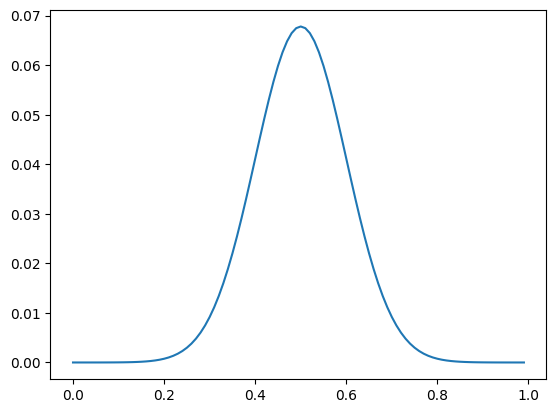

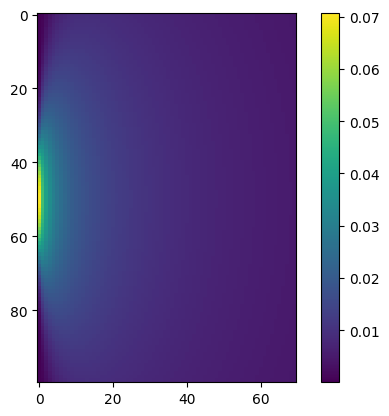

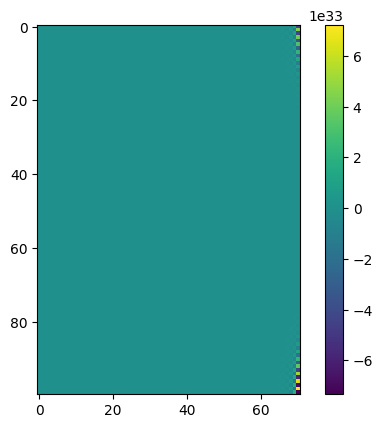

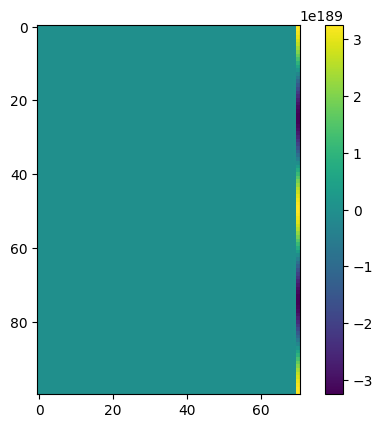

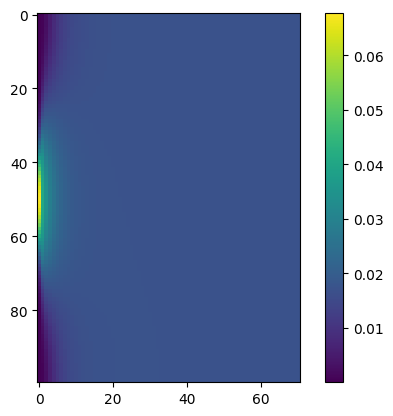

In [209]:
dx = 0.01
dt = dx/np.sqrt(2)
L = 1
endtime = 0.5
times = np.arange(0,endtime, dt)
x = np.arange(0,L, dx)

init = gaussian(x,0.5,0.1)
plt.plot(x, init)

solution = analytical(x[:, np.newaxis], times[1:])
plt.figure()
plt.imshow(solution)
plt.colorbar()

sol_explicit = explicit_euler(init,dx,times)
plt.figure()
plt.imshow(sol_explicit)
plt.colorbar()

sol_implicit = implicit_euler(init,dx,times)
plt.figure()
plt.imshow(sol_implicit)
plt.colorbar()

sol_crank = crank_nicolson(init,dx,times)
plt.figure()
plt.imshow(sol_crank)
plt.colorbar()

print(np.linalg.norm(solution[:,5] - sol_crank[:,5]))

# Task 3.7

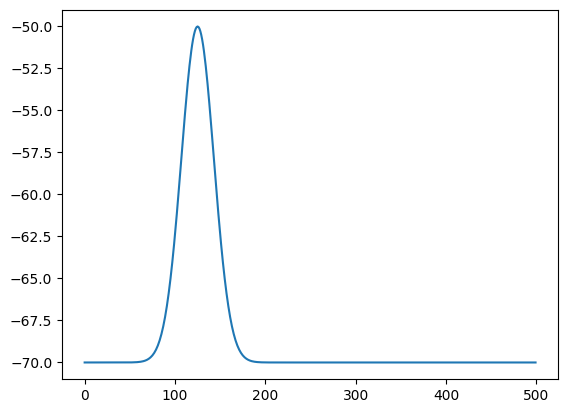

In [376]:
# Constants
lam = 0.18  # Square of lambda
tau = 2.0  # Tau
gamma = 0.5  # Gamma for g_Na
V_star = -40  # V* for g_Na
V_Na = 56  # Nernst potential for Na+
V_K = -76  # Nernst potential for K+
g_K = 5.0  # Constant permeability for K+

dx = 0.01
dt = tau*dx**2/(2*lam**2)
L = 5
endtime = 5.0
times = np.arange(0,endtime, dt)
x = np.arange(0,L, dx)

V_appl = -50 # mV
V_mem = -70 # mV
x0 = L/4

V0 = (V_appl - V_mem) * np.exp(-((x-x0)**2)/(2* lam**2)) + V_mem

plt.plot(V0)

In [377]:
def crank_nicolson_step(V, dx, dt, lam, tau, gamma, V_star, V_Na, V_K, g_K):
    N = len(V)
    r = lam**2 * dt / (dx**2 * tau)

    # Compute g_Na(V)
    def g_Na(V):
        return 1/5 + 100 / (1 + 1 - gamma * (V_star + V))

    # Setup tridiagonal matrix A for Crank-Nicolson
    main_diag = (1 + 2*r) * np.ones(N)
    off_diag = -r * np.ones(N-1)
    A = sp.sparse.diags([main_diag, off_diag, off_diag], offsets=[0, -1, 1], shape=(N, N)).tocsc()

    # Modify the first and last rows of A to implement Neumann BCs
    A[0, 0:2] = [1, -1]  # dV/dx at x=0 is zero
    A[-1, -2:] = [-1, 1]  # dV/dx at x=L is zero

    # Compute the source term B
    B = V + dt/tau * (g_Na(V) * (V - V_Na) + g_K * (V - V_K))

    # Apply Neumann BCs to B
    B[0] = 0
    B[-1] = 0

    # Solve the linear system
    V_new = sp.sparse.linalg.spsolve(A, B)

    return V_new


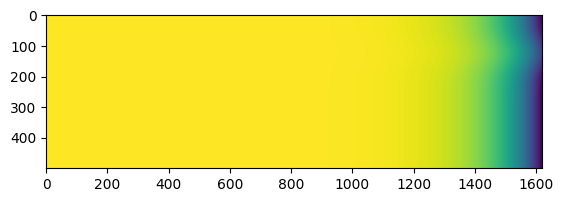

In [378]:
sol = np.zeros((len(x), len(times)))
sol[:, 0] = V0
# Run the simulation
for i in range(1, len(times)):
    sol[:,i] = crank_nicolson_step(sol[:,i-1], dx, dt, lam, tau, gamma, V_star, V_Na, V_K, g_K)

# Assuming you have a plotting function setup
# plot_voltage(x, V)  # You would implement this to visualize the result
plt.imshow(sol)

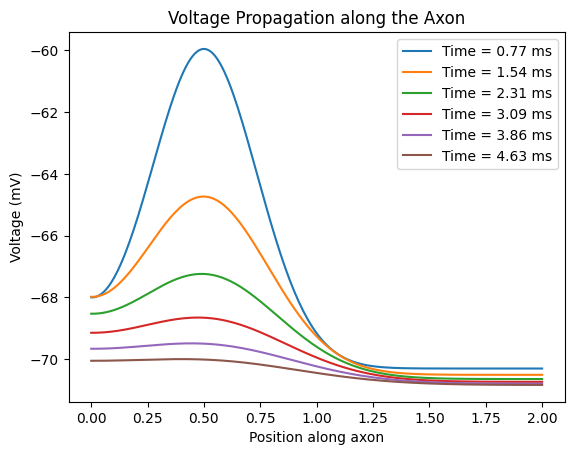

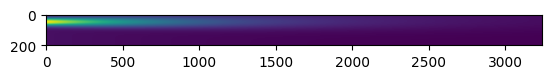

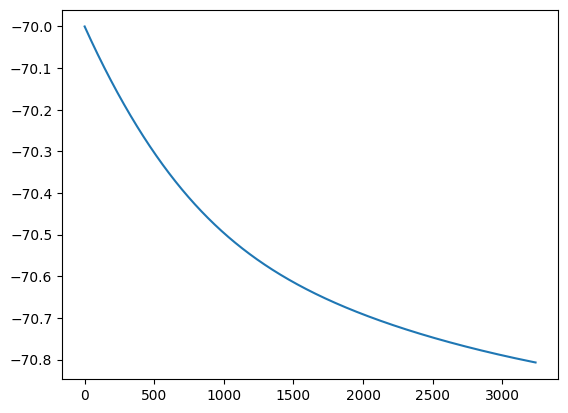

In [495]:
L = 2                       # Length 
T = 5.0                     # Total time (ms)
dx = 0.01                   # Spatial step
dt = tau*dx**2/(2*lam**2)/2   # Time step
lambda_sq = 0.18**2         # mm^2
tau = 2.0                   # ms
gamma = 0.5                 # mV^-1
V_star = -40                # Threshold potential (mV)
V_Na = 56                   # Nernst potential for Na (mV)
V_K = -76                   # Nernst potential for K (mV)
g_K = 5.0                   # Conductance for K (ohm^-1 m^-2)

# Derived parameters
Nx = int(L / dx) + 1   # Number of spatial points
Nt = int(T / dt) + 1   # Number of time points
x = np.linspace(0, L, Nx)  # Spatial grid

# Initial condition
x0 = L / 4           # Center of the initial pulse
Delta = 0.1            # Width of the initial pulse
V_app = -50           # Applied voltage at the initial pulse (mV)
V_mem = -70            # Resting membrane potential (mV)
V = (V_app - V_mem) * np.exp(-((x-x0)**2)/(2* lambda_sq)) + V_mem

# Precompute constants
coeff = lambda_sq * dt / (dx**2 * tau)

# gNa function
def gNa(V):
    return 100 / (1 + np.exp(gamma * (V_star - V))) + 1/5

sol = np.zeros((len(x), Nt))
sol[:, 0] = V

# Time integration
for n in range(1,Nt):
    # Update voltage using forward Euler and finite differences
    V_new = np.copy(V)
    V_new[1:-1] = V[1:-1] + coeff * (V[2:] - 2 * V[1:-1] + V[:-2]) - dt / tau * (gNa(V[1:-1]) * (V[1:-1] - V_Na)/g_K +  (V[1:-1] - V_K))
    
    # Apply Neumann boundary conditions
    V_new[0] = V_new[1]
    V_new[-1] = V_new[-2]
    
    V = V_new
    sol[:,n] = V
    # Optional: Plot at some steps to visualize
    if n % 500 == 0:
        plt.plot(x, V, label=f'Time = {n*dt:.2f} ms')

# Plotting results
plt.title('Voltage Propagation along the Axon')
plt.xlabel('Position along axon')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.show()

plt.figure()
plt.imshow(sol)

plt.figure()
plt.plot(sol[int(3*Nx/4),:])



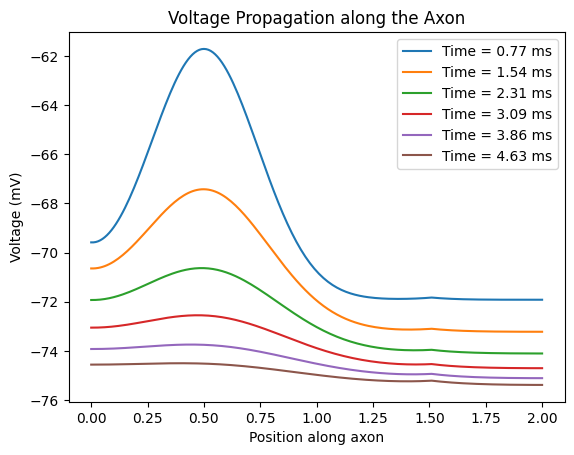

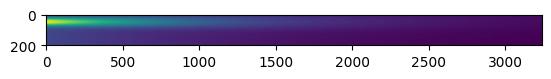

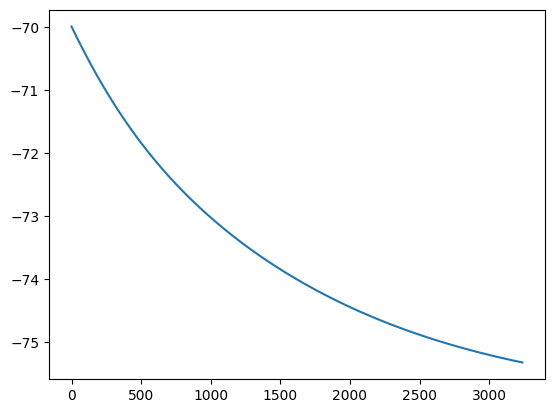

In [493]:
L = 2                       # Length (mm)
T = 5.0                     # Total time (ms)
dx = 0.01                   # Spatial step
dt = tau*dx**2/(2*lam**2)/2   # Time step
lambda_sq = 0.18**2         # mm^2
tau = 2.0                   # ms
gamma = 0.5                 # mV^-1
V_star = -40                # Threshold potential (mV)
V_Na = 56                   # Nernst potential for Na (mV)
V_K = -76                   # Nernst potential for K (mV)
g_K = 5.0                   # Conductance for K (ohm^-1 m^-2)

# Derived parameters
Nx = int(L / dx) + 1   # Number of spatial points
Nt = int(T / dt) + 1   # Number of time points
x = np.linspace(0, L, Nx)  # Spatial grid

# Initial condition
x0 = L / 4         # Center of the initial pulse
V_app = -50      # Applied voltage at the initial pulse (mV)
V_mem = -70            # Resting membrane potential (mV)
V = (V_app - V_mem) * np.exp(-((x-x0)**2)/(2* lambda_sq)) + V_mem

# Precompute constants
coeff = lambda_sq * dt / (dx**2 * tau)

# gNa function
def gNa(V,x_channel):
    res = np.zeros(len(V))
    res[np.where(x==x_channel)] = 100 / (1 + np.exp(gamma * (V_star - V[np.where(x==x_channel)]))) + 1/5
    return res

sol = np.zeros((len(x), Nt))
sol[:, 0] = V

# Time integration
for n in range(1,Nt):
    # Update voltage using forward Euler and finite differences
    V_new = np.copy(V)
    V_new[1:-1] = V[1:-1] + coeff * (V[2:] - 2 * V[1:-1] + V[:-2]) - dt / tau * (gNa(V[1:-1], x[int(6*Nx/8)]) * (V[1:-1] - V_Na)/g_K + (V[1:-1] - V_K))
    
    # Apply Neumann boundary conditions
    V_new[0] = V_new[1]
    V_new[-1] = V_new[-2]
    
    V = V_new
    sol[:,n] = V
    # Optional: Plot at some steps to visualize
    if n % 500 == 0:
        plt.plot(x, V, label=f'Time = {n*dt:.2f} ms')

# Plotting results
plt.title('Voltage Propagation along the Axon')
plt.xlabel('Position along axon')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.show()

plt.figure()
plt.imshow(sol)

plt.figure()
plt.plot(sol[int(5*Nx/8),:])


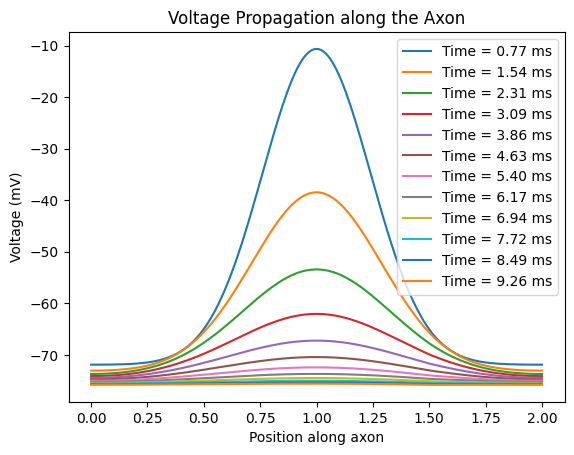

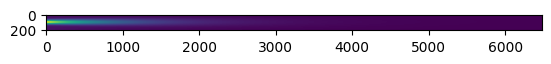

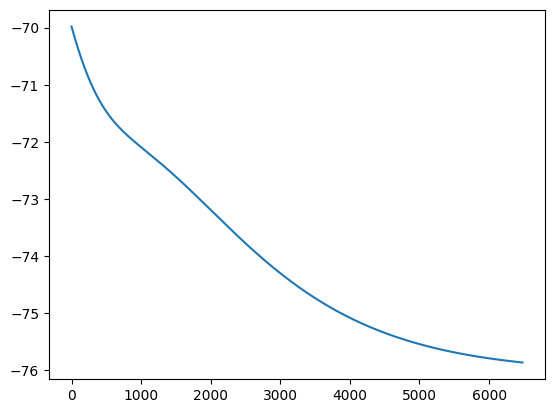

In [500]:
L = 2                       # Length 
T = 10.0                     # Total time (ms)
dx = 0.01                   # Spatial step
dt = tau*dx**2/(2*lam**2)/2   # Time step
lambda_sq = 0.18**2         # mm^2
tau = 2.0                   # ms
gamma = 0.5                 # mV^-1
V_star = -40                # Threshold potential (mV)
V_Na = 56                   # Nernst potential for Na (mV)
V_K = -76                   # Nernst potential for K (mV)
g_K = -5.0                   # Conductance for K (ohm^-1 m^-2)

# Derived parameters
Nx = int(L / dx) + 1   # Number of spatial points
Nt = int(T / dt) + 1   # Number of time points
x = np.linspace(0, L, Nx)  # Spatial grid

# Initial condition
x0 = L / 2           # Center of the initial pulse
Delta = 0.1            # Width of the initial pulse
V_app = 50           # Applied voltage at the initial pulse (mV)
V_mem = -70            # Resting membrane potential (mV)
V = (V_app - V_mem) * np.exp(-((x-x0)**2)/(2* lambda_sq)) + V_mem

# Precompute constants
coeff = lambda_sq * dt / (dx**2 * tau)

# gNa function
def gNa(V,x_channel):
    res = np.zeros(len(V))
    res[np.where(x==x_channel)] = 100 / (1 + np.exp(gamma * (V_star - V[np.where(x==x_channel)]))) + 1/5
    return res


sol = np.zeros((len(x), Nt))
sol[:, 0] = V

# Time integration
for n in range(1,Nt):
    # Update voltage using forward Euler and finite differences
    V_new = np.copy(V)
    V_new[1:-1] = V[1:-1] + coeff * (V[2:] - 2 * V[1:-1] + V[:-2]) - dt / tau * (gNa(V[1:-1], x[int(6*Nx/8)]) * (V[1:-1] - V_Na)/g_K +  (V[1:-1] - V_K))
    
    # Apply Neumann boundary conditions
    V_new[0] = V_new[1]
    V_new[-1] = V_new[-2]
    
    V = V_new
    sol[:,n] = V
    # Optional: Plot at some steps to visualize
    if n % 500 == 0:
        plt.plot(x, V, label=f'Time = {n*dt:.2f} ms')

# Plotting results
plt.title('Voltage Propagation along the Axon')
plt.xlabel('Position along axon')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.show()

plt.figure()
plt.imshow(sol)

plt.figure()
plt.plot(sol[int(7*Nx/8),:])